<a href="https://colab.research.google.com/github/Laxmi-404/Deep-Learning/blob/main/DL2_BASICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Image Classification of using Logistic Regression in PyTorch
import torch
import torchvision

In [ ]:
from torchvision.datasets import MNIST
# Torchvision contains utility for working with image data

In [ ]:
# Download training dataset
dataset=MNIST(root=r'C:\Users\Admin\OneDrive\Desktop\DEEP_LEARNING',download=True)
# dataset=MNIST(root='data/',download=True)


In [ ]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\Admin\OneDrive\Desktop\DEEP_LEARNING
    Split: Train

In [ ]:
len(dataset)

60000

In [ ]:
test_dataset=MNIST(root=r"C:\Users\Admin\OneDrive\Desktop\DEEP_LEARNING",train=False)
len(test_dataset)

10000

In [ ]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

Its a pair,consisting of 28*28 image and label.The image is an object of class PIL.Image.Image,which is part of Python Imaginary library Pillow.We can view the image using matplotlib,the de facto plotting and graphing library for data science in python.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# no popup
# Statements starting with % are called iPython magic commands.

Label: 5


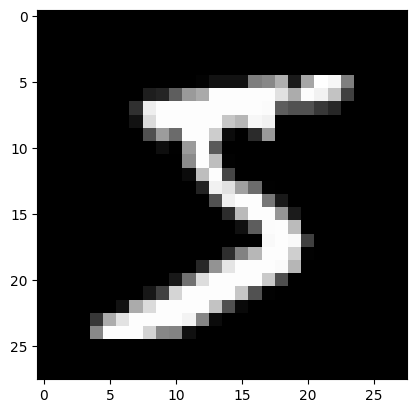

In [ ]:
image,label=dataset[0]
plt.imshow(image,cmap='gray')
print('Label:',label)
# gray scale image
# pixel by pixel plot of color of image

Label: 3


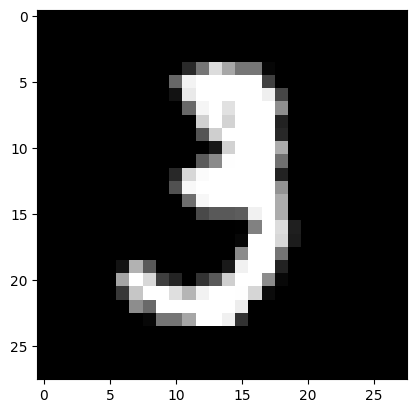

In [ ]:
image,label=dataset[10]
plt.imshow(image,cmap='gray')
print('Label:',label)

In [ ]:
# need for image to convert to tensors(identify karna hard hai!)
import torchvision.transforms as transforms

In [ ]:
root=r'C:\Users\Admin\OneDrive\Desktop\DEEP_LEARNING'
# MNIST(image and label)
dataset=MNIST(root=root,
              train=True,
              transform=transforms.ToTensor())

In [ ]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\Admin\OneDrive\Desktop\DEEP_LEARNING
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
img_tensor,label=dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


In machine learning, the label is the target or ground truth that a model is trying to predict or classify. It’s the value that the model aims to output correctly, given the input features.

In the context of the MNIST dataset:

Input: The images of the handwritten digits (28x28 pixel grayscale images).

Label (Target): The actual digit (from 0 to 9) that the image represents. For example, if an image shows the digit 5, the label for that image will be 5.

The image is now converted to 28 * 28 tensor.The first dimension is used to keep record of no of color channels.

For grayscale,there is one channel...RGB:3 Channel(red,green,blue)

In [ ]:
print(img_tensor[:,10:15,10:15])

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])


In [ ]:
print(img_tensor.min(),img_tensor.max())

tensor(0.) tensor(1.)


values from 0 to 1: 0 for black and 1 for white and rest different values of gray..

plot image using plt.imshow

In [ ]:
img_tensor

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

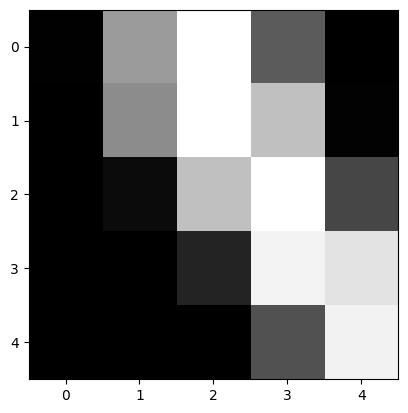

In [ ]:
# Plot the image by passing it in 28*28 matrix
# plt.imshow(img_tensor[0,10:15,10:15])
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray')

img_tensor[0]: This is selecting the first image in the batch of images.

If you have a batch of images, img_tensor will be a 4D tensor with dimensions (batch_size, channels, height, width).

Here, 0 refers to the first image in the batch.

Training and Validation Sets:

Training Set: used to train the model,compute the loss and adjust the weights using gradient descent.

Validation Set:used to evaluate the model while training ,adjust hyperparameters(lr) and pick the best version.

Test Set:used to compare diff models and report final accuracy of model.



In [ ]:
from torch.utils.data import random_split
train_ds,val_ds=random_split(dataset,[50000,10000])
len(train_ds),len(val_ds)

(50000, 10000)

Its important to choose a random sample for creating a validation set,because training daat is often ordered by labels that is image of 0s,1s,...If you were to pick 20% val dataset,the val will only contain 8 and 9 never seen by training set:imposible to train good model.

In [ ]:
# we need our data to be in batches
from torch.utils.data import DataLoader
batch_size=128
train_loader=DataLoader(train_ds,batch_size,shuffle=True)
val_loader=DataLoader(val_ds,batch_size)


We set shuffle=True for training dataset,so that batches for each epoch will be diff helping more generalization and speed up training process.

val_loader:evaluate the model,no need to shuffle

Logistic Regression is almost identical to linear regression where pred=x @ w.t()+b

We can use nn.Linear to create a model.

Since nn.Linear expects the training example to be vector,each 1X28X28 image tensor needs to be flattened out into a vector of size 784(28*28) before being passed into model.

The output for each image label is vector of size 10(for 0 to 9) representing prob of particular target,highest prob is that image.

In [ ]:
import torch.nn as nn
input_size=28*28
num_classes=10

# Logistic Regression model
model=nn.Linear(input_size,num_classes)

In [ ]:
print(model.weight.shape)
print(model.bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [ ]:
model.weight
# 6 weights,2 bias(nn.Linear)--prev eg
# 10 weights/prob,784 images(784 bias)

Parameter containing:
tensor([[ 3.2218e-02, -1.0356e-02, -1.7161e-02,  ...,  2.1150e-02,
          8.1957e-03,  3.2171e-02],
        [-2.4287e-02, -3.3673e-02,  1.4448e-02,  ..., -1.4004e-03,
         -1.7257e-02,  2.0640e-02],
        [ 1.5046e-02,  4.1027e-03,  5.3280e-03,  ..., -1.6705e-02,
         -8.4653e-04, -3.2217e-02],
        ...,
        [ 3.4351e-03,  2.6459e-02, -7.5096e-03,  ..., -2.7832e-02,
         -1.3086e-02, -2.6548e-03],
        [ 2.2224e-03, -7.1784e-03,  6.9273e-05,  ..., -2.8631e-02,
         -2.8335e-02,  4.6570e-03],
        [-1.9274e-03,  2.9255e-02, -1.7519e-02,  ...,  1.5463e-02,
         -2.1266e-02, -1.1036e-02]], requires_grad=True)

In [ ]:
model.bias

Parameter containing:
tensor([-0.0195, -0.0241,  0.0137, -0.0279, -0.0302,  0.0083,  0.0209, -0.0129,
         0.0336,  0.0265], requires_grad=True)

Weights are the parameters in a neural network that connect one layer to the next. They determine the importance of each feature or input in relation to the next layer's neurons.

How it works:
Each input feature (e.g., the pixel values in the MNIST image) is multiplied by a corresponding weight.
The weighted inputs are then summed together, and this sum is passed through an activation function (like ReLU or sigmoid) to generate the output of a neuron.
Shape of the Weights:
In a fully connected (dense) neural network, the shape of the weight matrix depends on the number of neurons in the input and output layers.
For example, if the input layer has 784 neurons (one for each pixel of a flattened 28x28 MNIST image) and the next layer has 128 neurons, the weight matrix between these layers will have a shape of (784, 128).
This means each of the 784 input features will be multiplied by 128 corresponding weights to produce the 128 values for the next layer's neurons.
Example:
Let's say the model has:

784 input features (for a flattened 28x28 image).

128 neurons in the hidden layer.

10 neurons in the output layer (for the 10 digits: 0-9).
The weight matrices will look like this:

From input layer to hidden layer: The weight matrix will have shape (784, 128).

From hidden layer to output layer: The weight matrix will have shape (128, 10).

Each weight determines how much influence each input has on the output neurons.

2. Biases:
A bias is an additional parameter that helps the model shift the activation function. While weights determine the strength of the connection between neurons, the bias allows the model to better fit the data by shifting the output of the neuron.

How it works:
After calculating the weighted sum of inputs, a bias term is added to this sum before passing it through the activation function.

This bias helps the model make better predictions, especially when all inputs are zero. Without bias, the output would always be zero, regardless of the inputs.

Shape of the Bias:
For each layer in the network, the bias is typically a vector with the same number of neurons as the layer.

For example, if the hidden layer has 128 neurons, then the bias vector for the hidden layer will have a shape of (128,), with one bias value for each neuron.

Similarly, if the output layer has 10 neurons, the bias vector for the output layer will have a shape of (10,).

In [ ]:
for images,labels in train_loader:
  print(labels)
  print(images.shape)
  # btach,colorchannels,pixels
  # outputs=model(images)
  # Our model expects batch of vector but we have given it batch of tensors.( deep nested tensors)
  break

tensor([7, 3, 3, 7, 5, 2, 1, 7, 6, 3, 2, 6, 8, 6, 8, 9, 7, 4, 4, 1, 2, 0, 9, 6,
        3, 4, 9, 4, 6, 6, 8, 2, 5, 8, 1, 7, 5, 3, 9, 3, 5, 3, 5, 1, 4, 6, 9, 7,
        4, 6, 6, 2, 9, 2, 0, 1, 9, 3, 0, 0, 7, 3, 6, 7, 1, 2, 5, 1, 4, 9, 8, 5,
        9, 6, 5, 5, 8, 8, 2, 7, 4, 8, 4, 9, 7, 2, 0, 5, 6, 8, 2, 3, 1, 1, 1, 9,
        0, 9, 4, 9, 7, 0, 2, 4, 1, 8, 0, 8, 0, 5, 2, 0, 3, 1, 9, 5, 3, 5, 2, 2,
        0, 1, 4, 8, 1, 1, 4, 1])
torch.Size([128, 1, 28, 28])


This leads to error,because our input data does not have right shape.Our images are of the shape(1*28*28) but we need them to be vectors of size 784,we need to flatten them out.We will use reshape method of tensor which allows us to view each image as a flat vector without really changing the underlying data.

In [ ]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(input_size,num_classes)

  def forward(self,xb):
    xb=xb.reshape(-1,784)
    out=self.linear(xb)
    return out

model=MnistModel()


To include additional functionality within our model,we need to define custom model,by extending the nn.module class from PyTorch.

def __init__(self)---->constructor
This is made when you instantiate the class.

super():upar se sare command utha lo...

nn.Linear ke andar self.Linear class

forward method gets batch of data(inputs-images)
reshape it to (128,784):retain 128 batches rest flatten out to 784

-1:figure out batch size on own

out=self.linear(xb)

EXPLANATION:
Here, MnistModel is a custom subclass of torch.nn.Module. This subclass defines a neural network that will be used for classification on the MNIST dataset.

nn.Module is the base class for all neural network modules in PyTorch. Every neural network you build will subclass this nn.Module class.

The __init__ method initializes the model and its layers. This is where we define the structure of the model.

super().__init__() ensures that the parent class (nn.Module) is properly initialized.

self.linear = nn.Linear(input_size, num_classes) creates a fully connected layer (dense layer).

input_size: This would be the size of the input to this layer. In the case of the MNIST dataset, each image is 28x28 pixels, so the input size should be 28 * 28 = 784.

num_classes: This is the number of output classes (in the case of MNIST, it would be 10 classes, representing digits 0 through 9).

The forward method defines how data flows through the network. It is called automatically during the forward pass.

xb = xb.reshape(-1, 784): The MNIST images are 28x28 pixels, which is reshaped into a flat vector of size 784 (28 * 28).

-1 is used as a placeholder for batch size, meaning that it automatically adjusts to the batch size.

out = self.linear(xb): This applies the fully connected layer (self.linear) to the input xb (which is now a vector of size 784).

return out: This returns the output of the linear layer.

 The output would be a tensor of size [batch_size, num_classes] where each value represents the predicted probability for each class.

 Batch size is the number of training samples (data points) that will be passed through the model at once before updating the model's weights.

Instead of training the model on the entire dataset at once (which is computationally expensive), we divide the dataset into smaller "batches" and train the model on each batch one at a time.


In [ ]:
print(model.linear.weight.shape,model.linear.bias.shape)

torch.Size([10, 784]) torch.Size([10])


In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0301, -0.0211, -0.0210,  ..., -0.0087,  0.0242,  0.0312],
         [-0.0328, -0.0319, -0.0260,  ..., -0.0136,  0.0353,  0.0241],
         [-0.0087,  0.0064, -0.0035,  ..., -0.0292,  0.0235,  0.0203],
         ...,
         [-0.0136, -0.0066, -0.0215,  ..., -0.0266,  0.0252,  0.0263],
         [ 0.0253, -0.0108, -0.0009,  ..., -0.0007,  0.0286, -0.0103],
         [ 0.0125,  0.0052, -0.0163,  ..., -0.0211, -0.0034, -0.0274]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0338,  0.0066,  0.0273,  0.0278, -0.0035,  0.0336, -0.0013, -0.0259,
          0.0094,  0.0353], requires_grad=True)]

Note that the model no longer has .weight and .bias (as they are now inside .linear attribute) but have .parameters method returning a list containing w and b.

In [ ]:
for images,labels in train_loader:
  print('images.shape:',images.shape)
  outputs=model(images)
  break
print('outputs.shape:',outputs.shape)
print('Sample outputs:',outputs[:2].data)
# print('Sample outputs:',outputs.data)

images.shape: torch.Size([128, 1, 28, 28])
outputs.shape: torch.Size([128, 10])
Sample outputs: tensor([[-0.2263, -0.0089,  0.1869,  0.5590,  0.5434, -0.1132, -0.1176,  0.1150,
         -0.1243,  0.0294],
        [-0.1654,  0.1922,  0.1901,  0.1654,  0.4649, -0.2310, -0.2877,  0.0104,
          0.1171, -0.3453]])


For each of 100 input images,we get 10 outputs,one for each class.

prob:0 to 1 mei lie...error?

In [ ]:
outputs[0]

tensor([-0.2263, -0.0089,  0.1869,  0.5590,  0.5434, -0.1132, -0.1176,  0.1150,
        -0.1243,  0.0294], grad_fn=<SelectBackward0>)

In [ ]:
# convert output row to probabilities:
# make elements positive
exps=torch.exp(outputs[0])
exps

tensor([0.7975, 0.9912, 1.2055, 1.7489, 1.7219, 0.8929, 0.8891, 1.1219, 0.8831,
        1.0299], grad_fn=<ExpBackward0>)

In [ ]:
# divide to get sum 1
probs=exps/torch.sum(exps)
probs

tensor([0.0707, 0.0879, 0.1069, 0.1550, 0.1526, 0.0791, 0.0788, 0.0994, 0.0783,
        0.0913], grad_fn=<DivBackward0>)

In [ ]:
torch.sum(probs)

tensor(1., grad_fn=<SumBackward0>)

The softmax function converts a vector of raw logits into probabilities, where the output is a vector of probabilities that sum to 1. Each element in the output represents the probability of each class.

In [ ]:
import torch.nn.functional as F

In [ ]:
# Apply softmax for each output row:
probs=F.softmax(outputs,dim=1)
# dim=0 represents batch size(128,10)

# Look at Sample distribution:
print('Sample probabilities:',probs[:2].data)

# Add the probab of each row
print('Sum:',torch.sum(probs[0]).item())


Sample probabilities: tensor([[0.0707, 0.0879, 0.1069, 0.1550, 0.1526, 0.0791, 0.0788, 0.0994, 0.0783,
         0.0913],
        [0.0813, 0.1162, 0.1160, 0.1132, 0.1527, 0.0761, 0.0719, 0.0969, 0.1078,
         0.0679]])
Sum: 1.0


.item( )is used to retrieve a single value from a scalar tensor (a tensor with just one element).

We can determine the predicted label for each image by simply choosing the index of the element with highest probability in each output row.

This is done using torch.max,which returns the largest element and index of largest element along a particular dim of tensor.

In [ ]:
max_probs,preds=torch.max(probs,dim=1)
print(preds)
print(max_probs)

tensor([3, 4, 3, 4, 4, 3, 3, 2, 3, 4, 8, 4, 4, 3, 2, 3, 4, 3, 2, 2, 4, 3, 0, 3,
        4, 4, 3, 5, 2, 3, 0, 4, 3, 3, 8, 2, 4, 3, 8, 4, 3, 3, 4, 3, 4, 4, 4, 4,
        4, 3, 4, 3, 3, 3, 8, 4, 4, 4, 4, 3, 3, 3, 2, 3, 2, 3, 4, 4, 4, 4, 3, 3,
        3, 4, 4, 2, 3, 3, 2, 4, 4, 4, 2, 3, 4, 5, 2, 3, 4, 4, 9, 3, 4, 2, 3, 3,
        4, 4, 4, 4, 4, 4, 4, 4, 5, 3, 2, 4, 3, 0, 2, 2, 3, 3, 4, 0, 3, 4, 2, 3,
        3, 3, 3, 4, 4, 4, 3, 3])
tensor([0.1550, 0.1527, 0.1644, 0.1375, 0.1564, 0.1334, 0.1279, 0.1542, 0.1291,
        0.1807, 0.1257, 0.1217, 0.1770, 0.1544, 0.1527, 0.1287, 0.1232, 0.1437,
        0.1232, 0.1125, 0.1598, 0.1412, 0.1172, 0.1237, 0.1278, 0.1546, 0.1527,
        0.1195, 0.1145, 0.1408, 0.1197, 0.1120, 0.1708, 0.1486, 0.1380, 0.1299,
        0.1409, 0.1374, 0.1346, 0.1198, 0.1448, 0.1165, 0.1286, 0.1378, 0.1555,
        0.1374, 0.1723, 0.1457, 0.1597, 0.1512, 0.1256, 0.1391, 0.1252, 0.1622,
        0.1223, 0.1704, 0.1673, 0.1209, 0.1443, 0.1592, 0.1244, 0.1366, 0.1368,
       

In [ ]:
labels

tensor([4, 7, 1, 4, 9, 3, 3, 5, 5, 7, 2, 6, 7, 5, 8, 3, 4, 1, 4, 6, 9, 4, 1, 5,
        1, 4, 4, 1, 5, 7, 1, 7, 6, 8, 2, 6, 8, 4, 3, 7, 5, 1, 1, 0, 2, 7, 7, 1,
        2, 6, 1, 1, 0, 0, 9, 7, 8, 1, 6, 0, 1, 5, 5, 0, 4, 6, 4, 2, 4, 9, 2, 6,
        0, 8, 2, 0, 1, 5, 0, 1, 4, 1, 4, 7, 0, 3, 2, 2, 7, 3, 0, 4, 7, 4, 5, 1,
        9, 8, 3, 8, 6, 7, 1, 3, 1, 1, 6, 2, 0, 8, 0, 5, 0, 3, 6, 1, 2, 9, 7, 0,
        0, 4, 2, 2, 4, 2, 5, 5])

In [ ]:
def accuracy(outputs,labels):
  _,preds=torch.max(outputs,dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

The underscore (_) represents a placeholder for a value that you do not need or care about

==: element wise comparison of 2 tensors with same shape and returns tensor of same shape(0:unequal,1 for equal)

Passing the results to torch.sum returns the no of labels that were predicted correctly.

softmax do not change relative order of the results,its increasing function...

In [ ]:
accuracy(outputs,labels)

tensor(0.0938)

While the accuracy is a great way for us to evaluate the models,it cant be used as loss function for optimizing our model using gradient descent.

Its not a differentiable fn.torch.max and == are both continous and non-diffferentiable operations,so we cant use accuracy for computing gradient wrt w and b.

accuracy doesnt tell how well the model doing for correct value,just capturing max value.

It doesnot take into account the actual probabilities predicted by model so it cant provide sufficient feedback for incremental improvement.

Commonly used loss function for classification problems is cross entropy function.

-For each output,pick the predicted probability for correct label.Eg:if the predicted prob:[0.1,0.3,0.2...] and correct label is 1,we pick 3

Then take logarithm of picked probab.

probability is high,close to 1,then logarithm is a v small negative no(log1=0),low loss

probability low,close to 0,log/ln is v high and added is - sign increasing the exponential value,high loss.

The take the average of cross entropy across all output rows to get overall loss.

Unlike accuracy,cross entropy is continous and differentiable fn(target label ko one hot encoded vector mei convert karlia) and finding log of all probab,so only those probability will be left with correct label(finding dot product)

In [ ]:
loss_fn=F.cross_entropy

In [ ]:
# loss for current batch of data
loss=loss_fn(outputs,labels)
print(loss)

tensor(2.3135, grad_fn=<NllLossBackward0>)


softmax is used to predict one class not four,five etc.

In [ ]:
F

<module 'torch.nn.functional' from '/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py'>

Since the cross entropy is neagtive log of the predicted probability of correct label over all training sample.

2.23 = e^-2.23 = 0.1(pred prob of corrected label)

Lower the loss,better the model



```
for epoch in range(num_epochs):
#Training phase
for batch in train_loader:
# Generate predictions
# Calculate the loss
# Compute the gradient
# Update the weight
# Reset the gradient

Validation phase
for batch in val_loader:
# Generate predictions
# Calculate the loss
# Calculate the metrics(accuracy)
# Calculate the average validation loss and metrics

<!-- Log epoch,loss and metrics for inspection -->
```



In [ ]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(input_size,num_classes)

  def forward(self,xb):
      xb=xb.reshape(-1,784)
      out=self.linear(xb)
      return out

  def training_step(self,batch):
    images,labels=batch
    out=self(images)
    # Think self as model and model is a callable function.
    loss=F.cross_entropy(out,labels)
    return loss

  def validation_step(self,batch):
    images,labels=batch
    out=self(images)
    loss=F.cross_entropy(out,labels)
    acc=accuracy(out,labels)
    return {'val_loss':loss,'val_acc':acc}

  def validation_epoch_end(self,outputs):
    batch_losses=[x['val_loss'] for x in outputs]
    epoch_loss=torch.stack(batch_losses).mean()
    batch_accs=[x['val_acc'] for x in outputs]
    epoch_acc=torch.stack(batch_accs).mean()
    return {'val_loss':(epoch_loss.item()),'val_acc':(epoch_acc.item())}

  def epoch_end(self,epoch,result):
    print("Epoch [{}],val_loss:{:.4f},val_acc:{:.4f}".format(epoch,result['val_loss'],result['val_acc']))

model=MnistModel()

batch_losses = [x['val_loss'] for x in outputs]: This line collects all the validation losses ('val_loss') from each element in outputs into a list.


epoch_loss = torch.stack(batch_losses).mean(): This line stacks all the losses in batch_losses into a single tensor and computes the mean loss across all the batches.


Make sure that outputs is a list of dictionaries, where each dictionary contains the key 'val_loss'. If outputs is structured differently, you'll need to adjust the code accordingly.

In [ ]:
def evaluate(model,val_loader):
  outputs=[model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

In [ ]:
result0=evaluate(model,val_loader)

In [ ]:
result0

{'val_loss': 2.275470495223999, 'val_acc': 0.17424841225147247}

In [ ]:
def fit(epochs,lr,model,train_loader,val_loader,opt_fn=torch.optim.SGD):
  history=[]
  optimizer=opt_fn(model.parameters(),lr)
  for epoch in range(epochs):
    # Training phase
    for batch in train_loader:
      loss=model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

      # Validation Phase
      result=evaluate(model,val_loader)
      model.epoch_end(epoch,result)
    history.append(result)
  return history

In [ ]:
history1=fit(5,0.001,model,train_loader,val_loader)

Epoch [0],val_loss:2.2466,val_acc:0.2112
Epoch [0],val_loss:2.2456,val_acc:0.2132
Epoch [0],val_loss:2.2446,val_acc:0.2151
Epoch [0],val_loss:2.2435,val_acc:0.2163
Epoch [0],val_loss:2.2426,val_acc:0.2174
Epoch [0],val_loss:2.2414,val_acc:0.2183
Epoch [0],val_loss:2.2403,val_acc:0.2188
Epoch [0],val_loss:2.2394,val_acc:0.2208
Epoch [0],val_loss:2.2383,val_acc:0.2221
Epoch [0],val_loss:2.2372,val_acc:0.2229
Epoch [0],val_loss:2.2362,val_acc:0.2247
Epoch [0],val_loss:2.2350,val_acc:0.2258
Epoch [0],val_loss:2.2339,val_acc:0.2274
Epoch [0],val_loss:2.2330,val_acc:0.2278
Epoch [0],val_loss:2.2319,val_acc:0.2301
Epoch [0],val_loss:2.2309,val_acc:0.2318
Epoch [0],val_loss:2.2299,val_acc:0.2334
Epoch [0],val_loss:2.2289,val_acc:0.2349
Epoch [0],val_loss:2.2277,val_acc:0.2369
Epoch [0],val_loss:2.2267,val_acc:0.2378
Epoch [0],val_loss:2.2256,val_acc:0.2401
Epoch [0],val_loss:2.2246,val_acc:0.2421
Epoch [0],val_loss:2.2236,val_acc:0.2438
Epoch [0],val_loss:2.2225,val_acc:0.2455
Epoch [0],val_lo

KeyboardInterrupt: 

hyperparameters set:batch_size,lr

fit function records validation loss and metrics from each epoch and record history of training process.

This is useful for debugging and visualising the training process.

We can achieve accuracy to certain limit,when it hits the limit.

relationship between pixel intensities and label

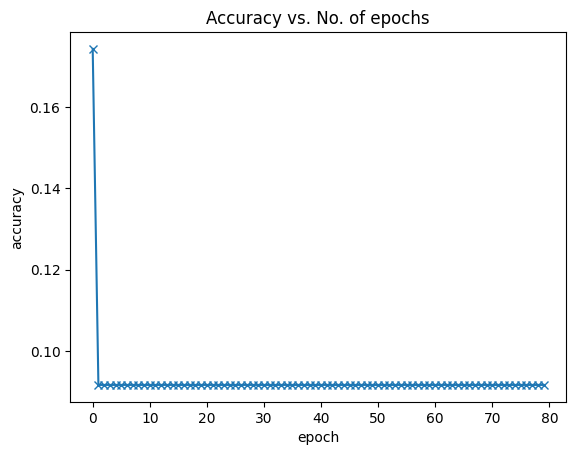

In [ ]:
# Replace these values with your results:
history=[result0]+history1
accuracies=[result['val_acc'] for result in history]
plt.plot(accuracies,'-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

The '-x' argument means that we will get a line plot with markers (x) on each data point.

In [ ]:
test_dataset=MNIST(root=root,
                   train=False,
                   transform=transforms.ToTensor())

label 7
Shape: torch.Size([1, 28, 28])


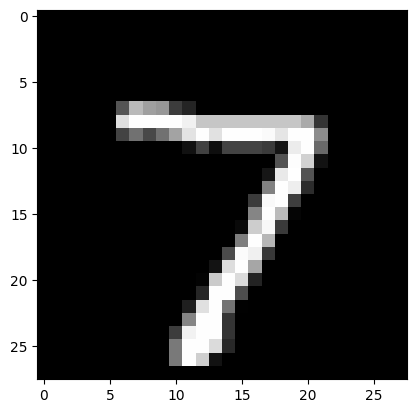

In [ ]:
img,label=test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('label',label)
print('Shape:',img.shape)

In [ ]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

img.unsqueeze(0): This operation will add an additional dimension at the beginning, turning the shape from (height, width) to (1, height, width).

This is typically used to create a batch of size 1, which is required when feeding data into a model, as most models expect the input shape to be (batch_size, channels, height, width).

In [ ]:
def predict_image(img,model):
  xb=img.unsqueeze(0)
  yb=model(xb)
  _,preds=torch.max(yb,dim=1)
  return preds[0].item()

img.unsqueeze adds the another dimension at the beginning og 1*28*28 tensor making it a 1*1*28*128 tensor making it this dim,which model view it as batch containing a single image.

Label: 7 Predicted: 5


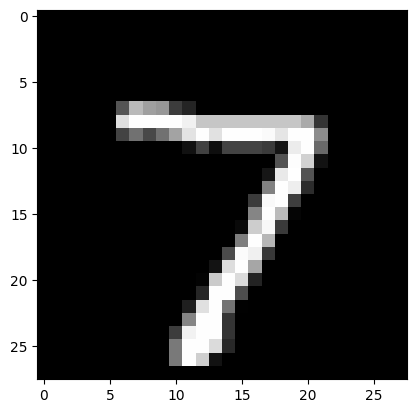

In [ ]:
img,label=test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('Label:',label,'Predicted:',predict_image(img[0],model))

Label: 0 Predicted: 8


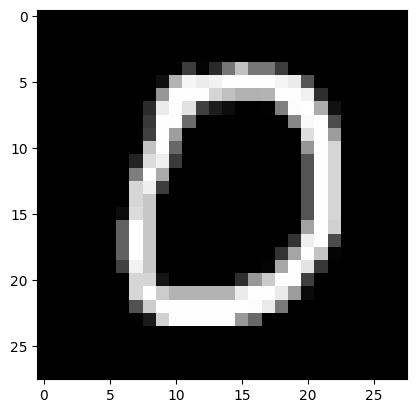

In [ ]:
img,label=test_dataset[10]
plt.imshow(img[0],cmap='gray')
print('Label:',label,'Predicted:',predict_image(img[0],model))

Label: 9 Predicted: 3


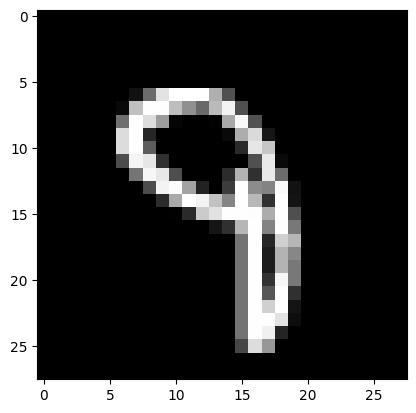

In [ ]:
img,label=test_dataset[193]
plt.imshow(img[0],cmap='gray')
print('Label:',label,'Predicted:',predict_image(img[0],model))

Label: 2 Predicted: 3


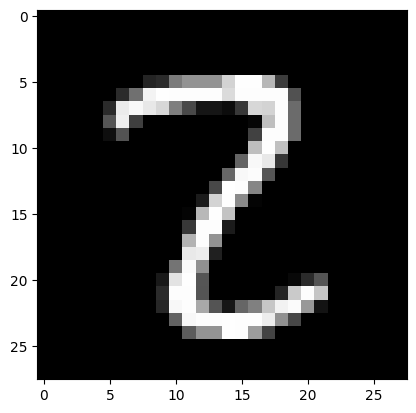

In [ ]:
img,label=test_dataset[1839]
plt.imshow(img[0],cmap='gray')
print('Label:',label,'Predicted:',predict_image(img[0],model))

1.Increasing training data

2.Regularising hyperparameters

In [ ]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: C:\Users\Admin\OneDrive\Desktop\DEEP_LEARNING
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
test_loader=DataLoader(test_dataset,batch_size=256)
result=evaluate(model,test_loader)
result

{'val_loss': 2.1824803352355957, 'val_acc': 0.30341798067092896}

In [ ]:
# Saving and loading the model
torch.save(model.state_dict(),'mnist-logistic-pth')

This saves only the parameters (weights and biases) of the model to a file named 'mnist-logistic-pth'.

You can later load this state dictionary using model.load_state_dict() to restore the model's learned parameters.



In [ ]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0204,  0.0230,  0.0256,  ..., -0.0057,  0.0121,  0.0214],
                      [ 0.0009,  0.0048, -0.0215,  ..., -0.0029, -0.0080, -0.0181],
                      [-0.0164, -0.0257, -0.0248,  ..., -0.0116, -0.0228, -0.0086],
                      ...,
                      [ 0.0196, -0.0019, -0.0219,  ..., -0.0050, -0.0213,  0.0039],
                      [-0.0234, -0.0126,  0.0190,  ...,  0.0168, -0.0030,  0.0286],
                      [-0.0205,  0.0019,  0.0269,  ..., -0.0213,  0.0078,  0.0138]])),
             ('linear.bias',
              tensor([ 0.0123,  0.0060, -0.0082,  0.0189,  0.0079,  0.0142, -0.0135, -0.0048,
                       0.0251, -0.0273]))])

It returns OrderedDict containing all weights,biases mapped to right attributes of model.

To load the model weights,we can instantiate a new object of class MnistModel and use the .load_state_dict

In [ ]:
model2=MnistModel()
model2.load_state_dict(torch.load('mnist-logistic-pth'))
model.state_dict()

<ipython-input-222-b458568cb24d>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load('mnist-logistic-pth'))


OrderedDict([('linear.weight',
              tensor([[-0.0204,  0.0230,  0.0256,  ..., -0.0057,  0.0121,  0.0214],
                      [ 0.0009,  0.0048, -0.0215,  ..., -0.0029, -0.0080, -0.0181],
                      [-0.0164, -0.0257, -0.0248,  ..., -0.0116, -0.0228, -0.0086],
                      ...,
                      [ 0.0196, -0.0019, -0.0219,  ..., -0.0050, -0.0213,  0.0039],
                      [-0.0234, -0.0126,  0.0190,  ...,  0.0168, -0.0030,  0.0286],
                      [-0.0205,  0.0019,  0.0269,  ..., -0.0213,  0.0078,  0.0138]])),
             ('linear.bias',
              tensor([ 0.0123,  0.0060, -0.0082,  0.0189,  0.0079,  0.0142, -0.0135, -0.0048,
                       0.0251, -0.0273]))])

In [ ]:
test_loader=DataLoader(test_dataset,batch_size=256)
result=evaluate(model2,test_loader)
result

{'val_loss': 2.1824803352355957, 'val_acc': 0.30341798067092896}